# Linear Regression Model
Use scikit learn for regression models to evalute effectiveness for climbing data

In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('filtered_data/categorized_data.csv')
train_df=pd.DataFrame(train)
train_df.head()

,Unnamed: 0,expid,myear,fname,lname,sex,calcage,citizen,status,leader,...,totmembers,smtmembers,mdeaths,o2used,pkgroup,pkname,heightm,heightf,lat,long
0,0,ANN180101,1980,Wolfgang,Broeg,1,32,171,60,0,...,8,4,0,True,0,Annapurna I,8091,26545,28.596111,83.820278
1,1,ANN180101,1980,Gustav,Harder,1,32,171,236,1,...,8,4,0,True,0,Annapurna I,8091,26545,28.596111,83.820278
2,2,ANN180101,1980,Nikolaus (Klaus),Harder,1,35,171,60,0,...,8,4,0,True,0,Annapurna I,8091,26545,28.596111,83.820278
3,3,ANN180101,1980,Erika,Heimrath,0,30,171,60,0,...,8,4,0,True,0,Annapurna I,8091,26545,28.596111,83.820278
4,4,ANN180101,1980,Thomas (Flo),Hummler,1,26,171,60,0,...,8,4,0,True,0,Annapurna I,8091,26545,28.596111,83.820278


In [3]:
train_df.columns

Index(['Unnamed: 0', 'expid', 'myear', 'fname', 'lname', 'sex', 'calcage',
       'citizen', 'status', 'leader', 'deputy', 'sherpa', 'tibetan',
       'msuccess', 'msolo', 'mo2used', 'death', 'peakid', 'year', 'season',
       'nation', 'leaders', 'sponsor', 'success', 'totmembers', 'smtmembers',
       'mdeaths', 'o2used', 'pkgroup', 'pkname', 'heightm', 'heightf', 'lat',
       'long'],
      dtype='object')

## Linear Regression Model

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle

In [5]:
# Split the columns to separate the features from the result/target data
features = train_df[['myear','sex','calcage','citizen','status','leader','deputy','sherpa','tibetan','msolo','mo2used',
                     'pkgroup','season','nation','leaders','sponsor','totmembers','smtmembers','o2used']]
target = train_df['msuccess']

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=41)

In [6]:
# Create a model
model = LinearRegression()

# Fitting our model with all of our features
model.fit(features_train, target_train)

score = model.score(features_train, target_train)
print(f"R2 Score: {score}")

R2 Score: 0.47499514065422643


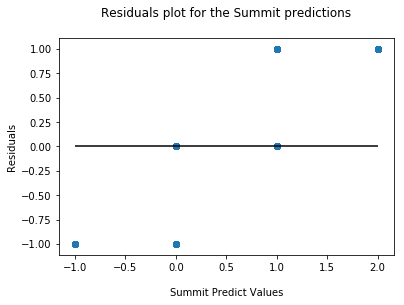

In [8]:
# predict
predictions = model.predict(features_test)

# Plot Residuals
predictions = predictions.round().astype(int)
target_test = target_test.astype(int)
plt.scatter(predictions, predictions - target_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.title("Residuals plot for the Summit predictions\n")
plt.xlabel("\nSummit Predict Values")
plt.ylabel("Residuals")
plt.savefig("Summit_regr_residuals_plot.jpg")

In [9]:
score = model.score(features_test, target_test)
print(f"R2 Score: {score}")

R2 Score: 0.47154096670418794


In [10]:
import sklearn
sklearn.metrics.accuracy_score(target_test,predictions)

0.8238223697862627

In [11]:
print("TRUE => PREDICTED")
actuals = target_test.tolist()
for i in range(len(actuals)):
    print(str(actuals[i]) + "=>" + str(predictions[i]))

TRUE => PREDICTED
0=>0
1=>1
0=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
1=>1
0=>0
1=>1
0=>0
1=>0
1=>1
0=>0
0=>1
0=>0
1=>1
1=>0
0=>0
0=>0
0=>1
0=>0
0=>0
1=>0
1=>1
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>1
1=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
1=>0
1=>1
0=>0
1=>1
1=>1
1=>1
0=>1
0=>0
1=>1
0=>0
0=>0
0=>1
0=>0
1=>1
1=>0
0=>0
0=>0
1=>1
0=>0
0=>0
1=>0
0=>0
0=>0
1=>0
0=>0
0=>0
1=>1
1=>1
1=>1
0=>0
1=>1
1=>1
0=>1
0=>0
1=>1
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>1
0=>0
0=>1
1=>1
1=>1
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>0
1=>1
1=>1
0=>0
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
0=>1
1=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
0=>0
0=>0
0=>0
1=>0
0=>0
0=>0
1=>0
0=>0
1=>1
1=>1
0=>0
0=>1
0=>0
0=>0
1=>2
0=>0
1=>1
1=>0
1=>1
1=>0
0=>-1
1=>1
0=>0
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>1
0=>0
1=>1
0=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0

0=>0
1=>1
1=>1
0=>0
0=>0
1=>0
0=>0
0=>0
0=>0
1=>1
1=>1
0=>0
1=>0
1=>1
0=>1
1=>0
1=>1
1=>1
1=>1
1=>1
1=>1
1=>0
1=>0
1=>1
1=>1
1=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
1=>0
1=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>0
1=>1
0=>0
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>0
1=>1
0=>0
0=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
0=>0
1=>1
0=>1
0=>0
1=>0
0=>0
0=>1
0=>0
0=>1
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>0
1=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>1
0=>0
0=>0
0=>1
1=>1
0=>0
1=>1
0=>0
1=>1
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>1
0=>0
1=>0
1=>1
0=>0
0=>0
1=>1
0=>0
0=>1
0=>0
1=>1
0=>0
0=>0
1=>0
0=>0
0=>1
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
0=>0
0=>1
1=>1
1=>1
0=>0
0=>0
0=>0
1=>1
1=>0
0=>0
1=>1
0=>0
0=>0
0=>0
1=>1
1=>1
1=>1
1=>2
1=>1
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
0=>0
0=>1
1=>1
0=>0
1=>0
1=>1
0=>0
0=>0
1=>1
1=>1
1=>1
0=>0
1=>1
0=>1
0=>0
1=>1
0=>0
1=>1
1=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>0
0=>0


0=>0
0=>0
1=>1
1=>1
1=>1
1=>1
0=>0
0=>0
0=>0
0=>1
0=>0
1=>1
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
0=>1
0=>0
0=>0
0=>0
1=>1
0=>0
0=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
1=>1
0=>0
1=>1
0=>0
0=>1
1=>1
0=>0
0=>0
1=>1
0=>0
1=>1
1=>0
0=>0
1=>0
0=>0
1=>1
0=>0
0=>0
0=>0
1=>1
1=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
1=>0
1=>0
0=>0
1=>1
0=>0
0=>0
0=>0
1=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
1=>0
1=>0
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
1=>0
0=>0
0=>1
0=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
1=>0
1=>1
0=>0
1=>1
1=>1
0=>0
1=>0
0=>0
1=>0
0=>0
0=>0
0=>1
0=>1
0=>0
1=>0
0=>0
0=>0
1=>0
0=>0
0=>0
1=>1
0=>0
0=>0
1=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
1=>0
1=>1
0=>0
1=>0
0=>0
0=>1
1=>1
1=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
1=>0
1=>0
0=>1
0=>0
1=>0
0=>0
1=>1
0=>0
0=>0
0=>0
1=>0
0=>0
1=>1
0=>0
1=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
1=>1


1=>1
1=>1
1=>1
0=>0
0=>0
0=>0
0=>1
0=>0
0=>0
0=>0
1=>1
1=>0
0=>0
1=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
0=>0
1=>1
1=>0
1=>1
0=>1
0=>0
1=>0
0=>0
0=>1
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
0=>0
1=>1
1=>1
0=>1
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>0
1=>1
1=>1
0=>0
0=>0
1=>0
1=>1
0=>1
1=>0
1=>0
0=>0
0=>0
0=>0
1=>1
1=>1
1=>1
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
0=>0
1=>0
1=>1
0=>1
0=>0
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
0=>0
1=>0
0=>0
1=>1
1=>0
0=>0
0=>0
0=>0
1=>1
0=>1
1=>1
1=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
1=>0
0=>0
1=>1
0=>1
0=>0
0=>0
1=>0
1=>1
0=>0
0=>0
0=>0
1=>1
0=>0
0=>1
0=>0
0=>1
0=>0
1=>1
1=>0
0=>0
0=>0
1=>0
1=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
1=>0
0=>0
1=>0
0=>1
0=>0
1=>1
1=>1
0=>0
1=>1
0=>0
1=>1
0=>0
1=>1
1=>1
0=>0
1=>1
0=>0
1=>1
1=>1
0=>0
0=>0
0=>1
0=>0
0=>0
0=>1
1=>1
1=>1
0=>0
0=>1
1=>1
0=>0
0=>0
1=>0
0=>1
0=>0
1=>0
0=>0
1=>1
0=>1
0=>0
0=>0
0=>0
0=>0


0=>0
0=>0
0=>0
0=>1
0=>0
0=>0
0=>0
1=>1
1=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>0
0=>0
0=>0
1=>1
0=>1
0=>0
0=>0
0=>0
0=>0
1=>0
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
0=>0
0=>0
0=>1
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>1
0=>1
0=>0
0=>0
0=>0
0=>1
1=>1
0=>0
1=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
1=>1
1=>1
1=>0
0=>0
0=>-1
0=>0
0=>1
0=>0
1=>1
1=>1
0=>1
0=>1
0=>0
1=>1
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>1
0=>0
1=>1
1=>1
1=>0
1=>0
0=>1
0=>0
0=>0
0=>0
0=>0
1=>0
1=>1
1=>1
1=>1
1=>1
1=>1
1=>0
1=>1
0=>0
0=>1
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
0=>1
0=>0
0=>1
1=>1
0=>1
1=>0
0=>0
1=>1
0=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>0
0=>0
0=>-1
1=>1
1=>1
0=>0
0=>0
1=>1
1=>1
0=>0
1=>0
0=>0
0=>0
0=>0
0=>0
0=>1
0=>0
0=>0
0=>1
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>0
1=>1
1=>1
1=>1
0=>0
0=>0
0=>0
0=>0
1=>1
0=>0
0=>0
0=>0
0=>0
0=>0
0=>1
1=>0
1=>1
0=>0
1=>1
0=>0
1=>1
0=>0
1=>0
0=>

In [12]:
data_test = pd.DataFrame(data = {"actual": actuals, "predicted": predictions})
data_test.head()

,actual,predicted
0,0,0
1,1,1
2,0,1
3,0,0
4,0,0


In [13]:
# Save the model to a file
filename = "SummitLinearModel.pkl"
pickle.dump(model, open(filename, "wb"))

In [14]:
# load the model from disk
loaded_model = pickle.load(open(filename, "rb"))

In [15]:
score = loaded_model.score(features_train, target_train)
print(f"R2 Score: {score}")

R2 Score: 0.47499514065422643
